In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [3]:
test = pd.read_csv('test.csv', sep=';')

In [4]:
data = pd.read_csv('train.csv', sep=';')

In [5]:
data.is_worldskills_participant = data.is_worldskills_participant.replace(True, 1)
data.is_worldskills_participant = data.is_worldskills_participant.replace('Участник движения', 0.5)
data.is_worldskills_participant = data.is_worldskills_participant.replace('Участник движения, Данные подтверждены', 1)
data.is_worldskills_participant = data.is_worldskills_participant.replace(False, 0)
data.is_worldskills_participant = data.is_worldskills_participant.fillna(0)
data.has_qualifications = data.has_qualifications.replace(True, 1)
data.has_qualifications = data.has_qualifications.replace(False, 0)
data.has_qualifications = data.has_qualifications.replace('Свидетельство о независимой оценке квалификации', 1)
data.has_qualifications = data.has_qualifications.fillna(0)
data.travel_ready = data.travel_ready.replace(True, 1)
data.travel_ready = data.travel_ready.replace(False, 0)
data.travel_ready = data.travel_ready.fillna(0)
data.relocation_ready = data.relocation_ready.replace(True, 1)
data.relocation_ready = data.relocation_ready.replace(False, 0)
data.relocation_ready = data.relocation_ready.fillna(0)
data.retraining_ready = data.retraining_ready.replace(True, 1)
data.retraining_ready = data.retraining_ready.replace(False, 0)
data.retraining_ready = data.retraining_ready.fillna(0)


In [6]:
data.drive_licences = data.drive_licences.replace('[B, C, D, E]', 5)

data.drive_licences = data.drive_licences.fillna(0)

data.drive_licences = data.drive_licences.replace('[A]', 1)

data.drive_licences = data.drive_licences.replace('[B]', 2)

data.drive_licences = data.drive_licences.replace('[C]', 3)

data.drive_licences = data.drive_licences.replace('[D]', 4)

data.drive_licences = data.drive_licences.replace('[A, B]', 2)

data.drive_licences = data.drive_licences.replace('[A, C]', 3)

data.drive_licences = data.drive_licences.replace('[A, D]', 4)

data.drive_licences = data.drive_licences.replace('[A, E]', 4)

data.drive_licences = data.drive_licences.replace('[E]', 5)

data.drive_licences = data.drive_licences.replace('[B, C]', 3)

data.drive_licences = data.drive_licences.replace('[B, D]', 4)

data.drive_licences = data.drive_licences.replace('[B, E]', 3)

data.drive_licences = data.drive_licences.replace('[C, B]', 3)

data.drive_licences = data.drive_licences.replace('[C, D]', 4)

data.drive_licences = data.drive_licences.replace('[C, E]', 4)

data.drive_licences = data.drive_licences.replace('[D, E]', 4)

data.drive_licences = data.drive_licences.replace('[A, C, E]',4)

data.drive_licences = data.drive_licences.replace('[A, B, D]', 4)

data.drive_licences = data.drive_licences.replace('[A, B, E]', 3)

data.drive_licences = data.drive_licences.replace('[A, B, C]', 3)

data.drive_licences = data.drive_licences.replace('[A, C, D]', 4)

data.drive_licences = data.drive_licences.replace('[B, C, D]', 4)

data.drive_licences = data.drive_licences.replace('[B, C, E]', 4)

data.drive_licences = data.drive_licences.replace('[В, С, Е]', 4)

data.drive_licences = data.drive_licences.replace('[B, D, E]', 4)

data.drive_licences = data.drive_licences.replace('[A, D, E]', 4)

data.drive_licences = data.drive_licences.replace('[C, D, E]', 4)

data.drive_licences = data.drive_licences.replace('[A, B, C, E]', 5)

data.drive_licences = data.drive_licences.replace('[A, B, D, E]', 5)

data.drive_licences = data.drive_licences.replace('[A, B, C, D]', 4)

data.drive_licences = data.drive_licences.replace('[A, B, C, D, E]', 5)

In [7]:
data.position = data.position.apply(len) 

In [8]:
data.salary_desired.fillna(0)

0         35000
1         15000
2         20000
3         30000
4         40000
          ...  
306265    25000
306266    25000
306267    40009
306268    30000
306269    30000
Name: salary_desired, Length: 306270, dtype: int64

In [9]:
data.experience.fillna(0)

0          3
1          4
2         12
3          9
4          1
          ..
306265     0
306266     1
306267     0
306268     4
306269     1
Name: experience, Length: 306270, dtype: int64

In [10]:
data.education_type = data.education_type.fillna(0)

data.education_type = data.education_type.replace('Среднее', 1)

data.education_type = data.education_type.replace('Среднее профессиональное', 2)

data.education_type = data.education_type.replace('Незаконченное высшее', 3)

data.education_type = data.education_type.replace('Высшее', 4)

In [11]:
data.columns

Index(['id', 'position', 'region', 'industry', 'locality', 'locality_name',
       'education_type', 'drive_licences', 'citizenship', 'schedule',
       'employement_type', 'age', 'gender', 'experience', 'salary_desired',
       'relocation_ready', 'travel_ready', 'retraining_ready',
       'is_worldskills_participant', 'has_qualifications', 'completeness_rate',
       'creation_date', 'modification_date', 'publish_date', 'salary'],
      dtype='object')

In [12]:
data.gender = data.gender.replace('Мужской', 1)

In [13]:
data.gender = data.gender.replace('Женский', 0)

In [14]:
data.gender = data.gender.fillna(0)

In [15]:
y = data.salary


In [16]:
data_features = ['is_worldskills_participant', 
                 'has_qualifications', 
                 'drive_licences',  
                 'relocation_ready', 
                 'travel_ready', 
                 'retraining_ready', 
                 'experience',
                 'locality',
                 'salary_desired',
                 'education_type',
                'position',
                'gender']

In [17]:
x = data[data_features]

In [18]:
#x.fillna(x.mean())

In [19]:
model = DecisionTreeRegressor(random_state=1)


In [20]:
model.fit(x.fillna(x.mean()),y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [21]:
print("делаем прогноз по 5 зарплатам:")
print(x.head())
print("прогнозы такие")
print(model.predict(x.head()))

делаем прогноз по 5 зарплатам:
   is_worldskills_participant  has_qualifications  drive_licences  \
0                         0.0                 0.0               2   
1                         0.0                 0.0               2   
2                         0.0                 0.0               2   
3                         0.0                 0.0               2   
4                         0.0                 0.0               0   

   relocation_ready  travel_ready  retraining_ready  experience  \
0               0.0           0.0               1.0           3   
1               0.0           1.0               1.0           4   
2               0.0           0.0               1.0          12   
3               0.0           0.0               0.0           9   
4               0.0           0.0               0.0           1   

        locality  salary_desired  education_type  position  gender  
0  7100000100000           35000               3        10     1.0  
1  2200000100

In [22]:
predicted_salary = model.predict(x.fillna(x.mean()))
mean_absolute_error(y, predicted_salary)

464.20439661494

In [23]:
import numpy as np
solution = test[['id']].copy()
mean = data['salary'].mean() + 5000
solution['salary'] = pd.DataFrame(predicted_salary)

In [24]:
print(predicted_salary)

[37500. 14000. 24600. ... 97165. 27600. 32500.]


In [25]:
solution.head()

,id,salary
0,2,37500.0
1,6,14000.0
2,7,24600.0
3,11,16075.0
4,16,22080.0


In [215]:
solution.to_csv('/home/codecraftman/my_solution1.csv', sep=',', index=False)

In [154]:
train_X, val_X, train_y, val_y = train_test_split(x.fillna(x.mean()), y, random_state = 0)

In [155]:
salary_model = DecisionTreeRegressor()

In [156]:
salary_model.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [157]:
val_predictions = salary_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

21666.91636031418


In [158]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  17500
Max leaf nodes: 50  		 Mean Absolute Error:  16369
Max leaf nodes: 500  		 Mean Absolute Error:  16265
Max leaf nodes: 5000  		 Mean Absolute Error:  17171


In [159]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
salary_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, salary_preds))

17221.07408677167


In [62]:
print(salary_preds)

[33079.54020602 34093.80709388 61959.9543247  ... 28580.73421173
 96407.53044346 49905.43852599]


In [161]:
test.id


0              2
1              6
2              7
3             11
4             16
           ...  
131254    437515
131255    437518
131256    437526
131257    437527
131258    437528
Name: id, Length: 131259, dtype: int64

In [164]:
data.salary.mean() + 50000


90941.32367845366

In [160]:
print(data.salary.mean())

40941.32367845365


In [101]:
import numpy as np

In [102]:
solution = test[['id']].copy()

In [103]:
mean = data['salary'].mean() + 5000

In [104]:
solution['salary'] = pd.Series(salary_preds)

In [105]:
solution.head()

,id,salary
0,2,33079.540206
1,6,34093.807094
2,7,61959.954325
3,11,29050.681759
4,16,79117.729753


In [106]:
len(solution)

131259

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84c7a5b9e8>]],
      dtype=object)

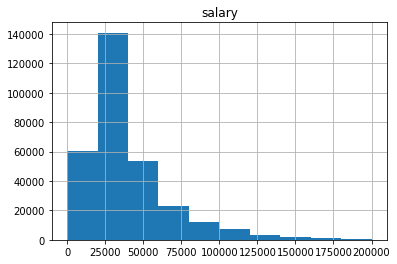

In [47]:
data[data.salary < 200000].hist(column='salary', bins=10)

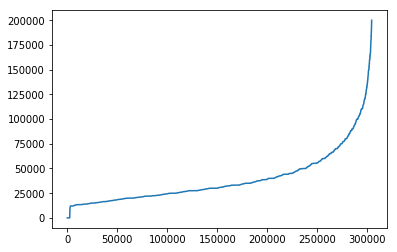

In [48]:
from matplotlib import pyplot as plt
salaries_asc = data.salary[data.salary < 200000].sort_values().to_list()
plt.plot(salaries_asc)

In [87]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
	assert len(y) == len(y_pred)
	terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
	return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [88]:
#salary_preds = 37.06993

In [113]:
print(rmsle(test[['id']], solution))

KeyError: 0

In [109]:
print(len(test))

131259


In [110]:
print(len(solution))

131259


In [112]:
solution.head()

,id,salary
0,2,33079.540206
1,6,34093.807094
2,7,61959.954325
3,11,29050.681759
4,16,79117.729753


In [65]:
# И здесь всё же .csv

import numpy as np
solution = test[['id']].copy()
mean = train['salary'].mean() + 5000
solution['salary'] = pd.Series(np.full(len(test), mean))

NameError: name 'test' is not defined